
<b>Employee Attrition and Factors</b>

<b>Libraries used</b>

In [1]:
#install required libraries
"""
!pip install matplotlib
!pip install seaborn
!pip install plotly
!pip install wordcloud
!pip install altair
!pip install missingno
!pip install imbalanced-learn
!pip install sklearn
"""

'\n!pip install matplotlib\n!pip install seaborn\n!pip install plotly\n!pip install wordcloud\n!pip install altair\n!pip install missingno\n!pip install imbalanced-learn\n!pip install sklearn\n'

In [2]:
import pandas as pd
import numpy as np

#Library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from plotly.offline import iplot
from plotly.subplots import make_subplots
import missingno as msno
from pandas.plotting import parallel_coordinates
import altair as alt

#Library for building machine learning models
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

 Introduction

In [3]:
#Read data and calculate number of rows and columns
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv", sep = ',', header = 0)

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# shape check for the dataset.
num_rows, num_cols = df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 1470
Number of columns: 35


In [5]:
#Duplicate_Check
have_duplicate_rows = df.duplicated().any()
have_duplicate_rows

False

In [6]:
# Statistics of `numerical` columns
describe = df.describe()
missing_rates = df[describe.columns].isna().mean()
missing_rates.name = 'missing_rate'
describe = pd.concat([describe, missing_rates.to_frame().T])
describe

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000
missing_rate,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
#Statistics of `category` columns
describe = df.describe(include=['O'])
missing_rates = df[describe.columns].isna().mean()
missing_rates.name = 'missing_rate'
describe = pd.concat([describe, missing_rates.to_frame().T])
describe

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054
missing_rate,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


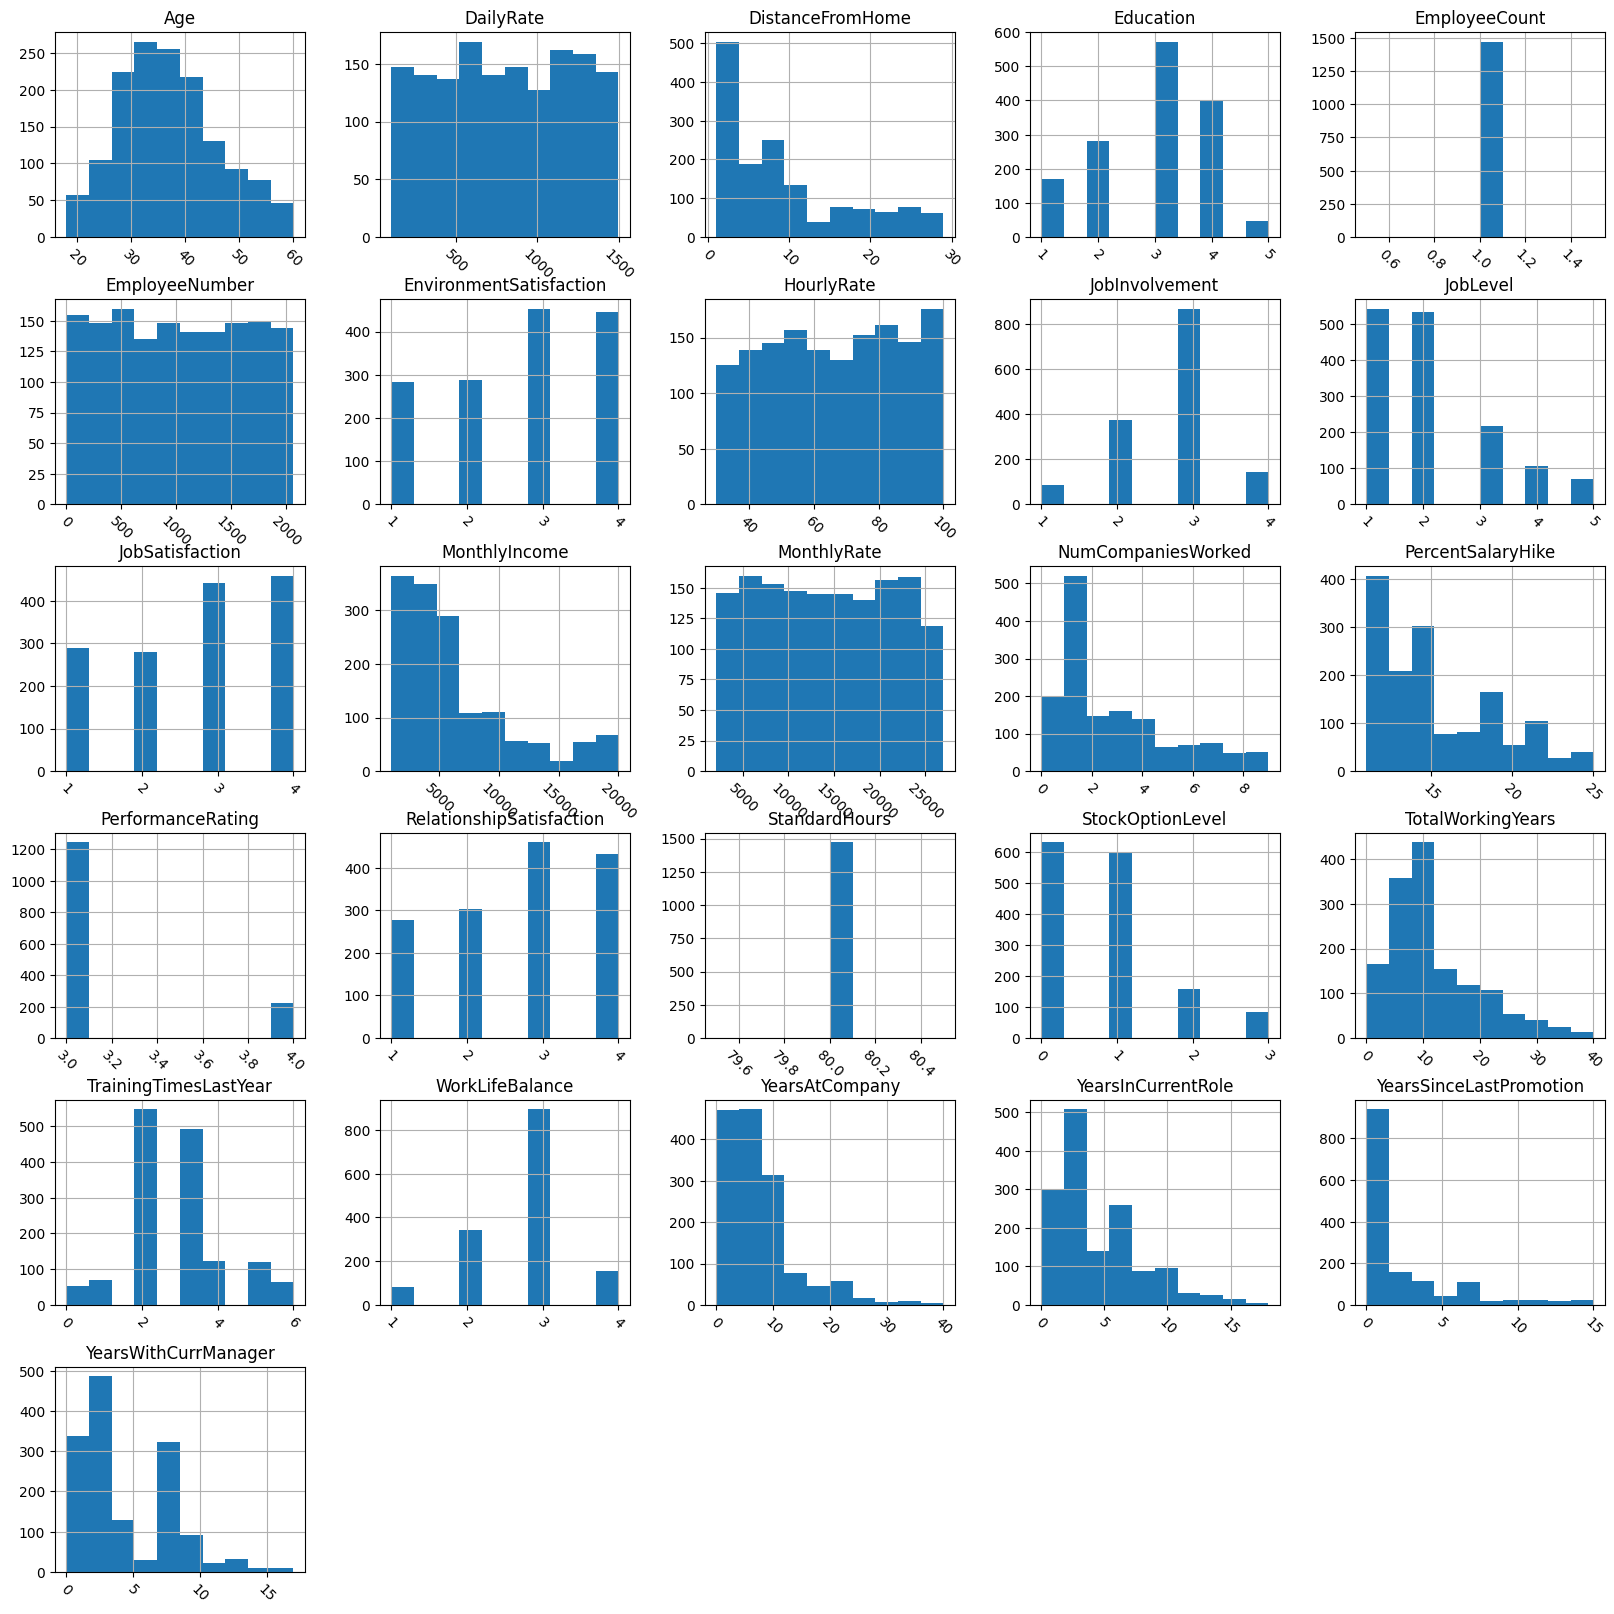

In [8]:
#`histogram` for `numerical` columns
df.hist(figsize=(20,20), xrot=-45)
plt.show()

In [9]:
#Checking Datatype of columns
col_dtype = df.dtypes
col_dtype

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [10]:
#We use `select_dtypes` method to list columns of type `numerical` and `category`.
cat_coulmns  = df.select_dtypes(['object']).columns
num_coulmns  = df.select_dtypes(['number']).columns
print(cat_coulmns)
print(num_coulmns)

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')
Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


6. Consider the value set of categorical attribute.

In [11]:
# Consider the value set of categorical attribute.
num_cols = list(set(df._get_numeric_data()))
cat_cols = list(set(df.columns) - set(df._get_numeric_data()))

In [12]:
# Analysis of categorical attributes.
for col in cat_cols:
    print('Unique values of ', col, set(df[col]))

Unique values of  Over18 {'Y'}
Unique values of  OverTime {'Yes', 'No'}
Unique values of  Gender {'Female', 'Male'}
Unique values of  EducationField {'Other', 'Life Sciences', 'Medical', 'Human Resources', 'Marketing', 'Technical Degree'}
Unique values of  Department {'Sales', 'Research & Development', 'Human Resources'}
Unique values of  BusinessTravel {'Non-Travel', 'Travel_Frequently', 'Travel_Rarely'}
Unique values of  JobRole {'Sales Executive', 'Sales Representative', 'Manufacturing Director', 'Laboratory Technician', 'Human Resources', 'Research Scientist', 'Research Director', 'Manager', 'Healthcare Representative'}
Unique values of  MaritalStatus {'Married', 'Divorced', 'Single'}
Unique values of  Attrition {'Yes', 'No'}


In [13]:
#Checking for Null/missing Entries in dataset
missing_ratio = df[num_cols].isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio_df = pd.DataFrame({'missing_ratio': missing_ratio})
missing_ratio_df

,missing_ratio
Age,0.0
StandardHours,0.0
RelationshipSatisfaction,0.0
JobLevel,0.0
EnvironmentSatisfaction,0.0
Education,0.0
YearsAtCompany,0.0
YearsInCurrentRole,0.0
YearsSinceLastPromotion,0.0
YearsWithCurrManager,0.0


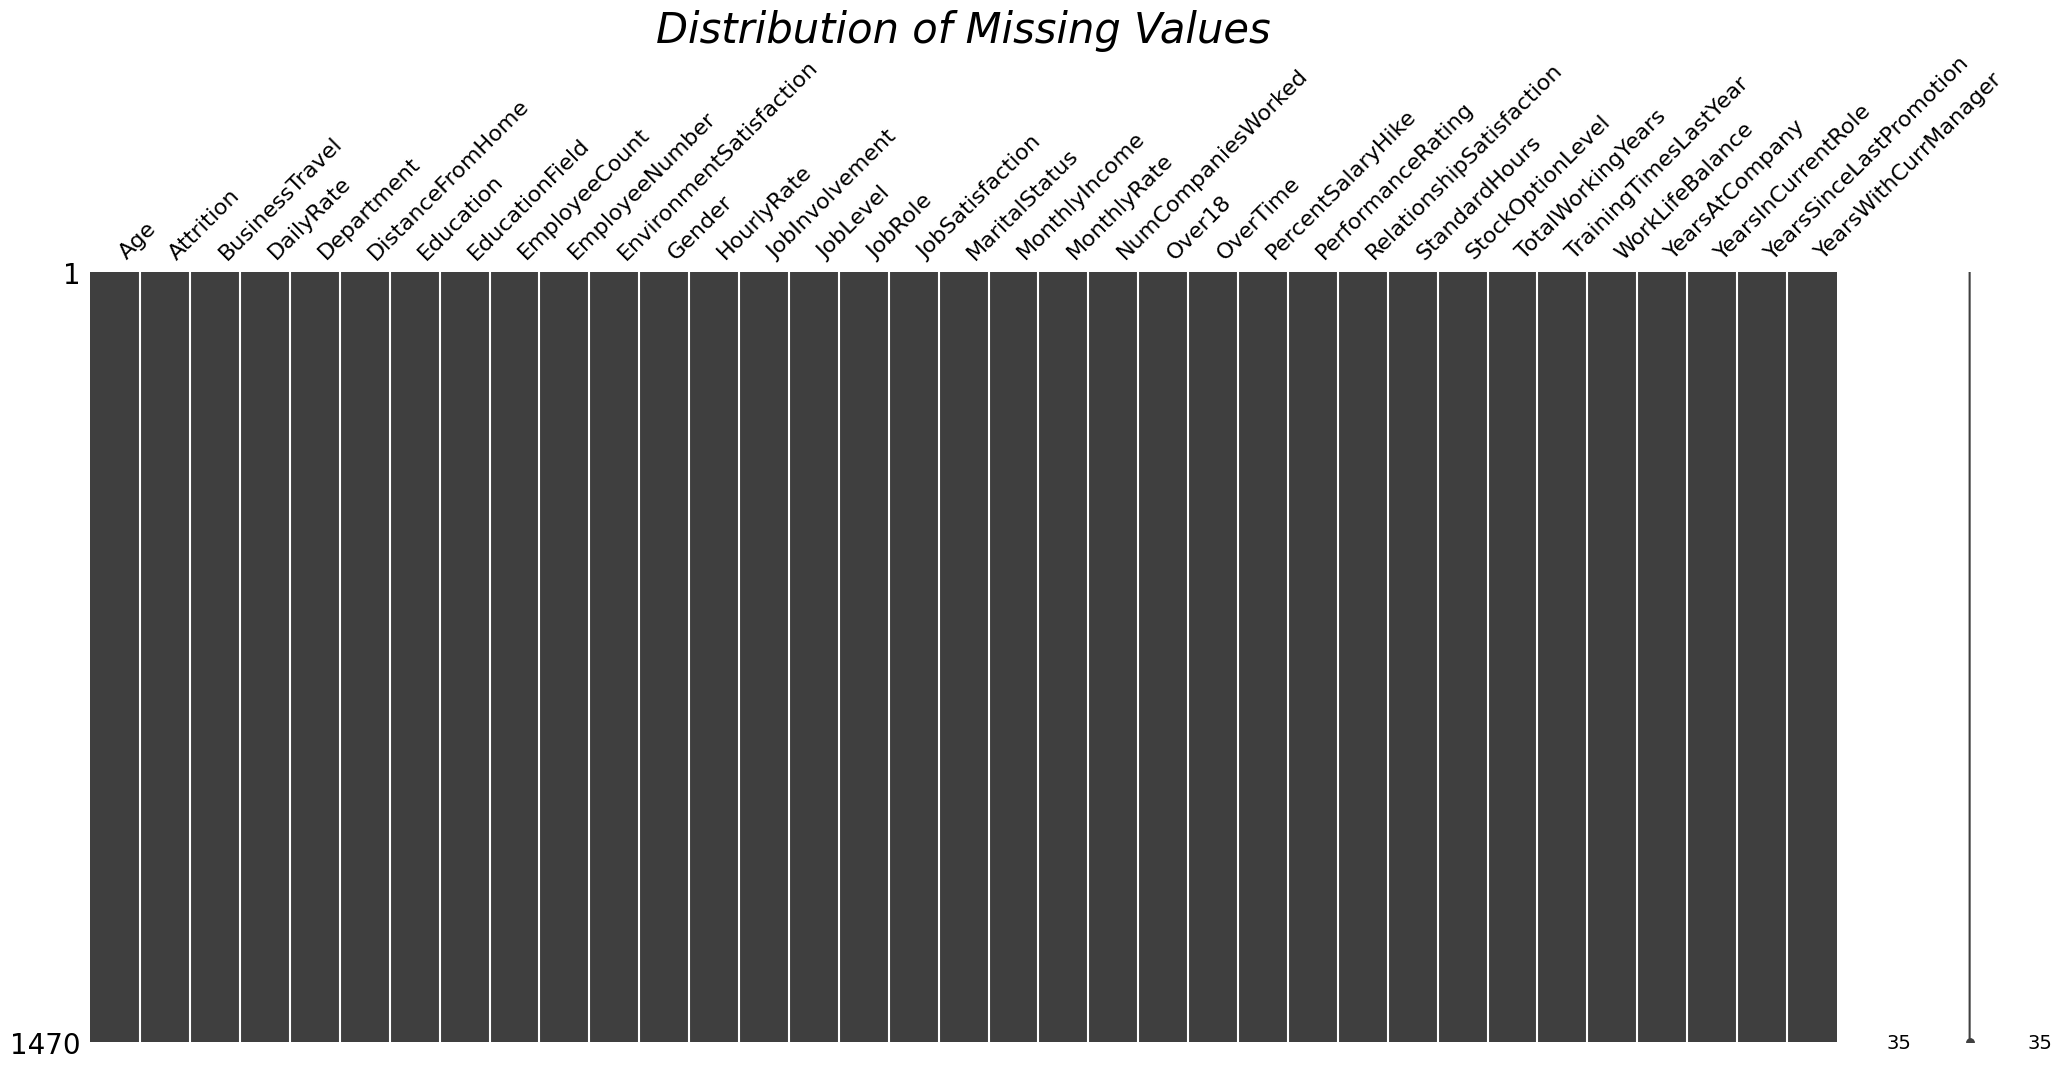

In [14]:
#
msno.matrix(df)
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

In [15]:
#Calculate descriptive statistics using the `describe()` method.
num_cols_info_df = df[num_cols].describe()
num_cols_info_df

,Age,StandardHours,RelationshipSatisfaction,JobLevel,EnvironmentSatisfaction,Education,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,...,EmployeeCount,JobSatisfaction,TrainingTimesLastYear,DistanceFromHome,HourlyRate,PercentSalaryHike,TotalWorkingYears,DailyRate,JobInvolvement,PerformanceRating
count,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,80.0,2.712245,2.063946,2.721769,2.912925,7.008163,4.229252,2.187755,4.123129,...,1.0,2.728571,2.799320,9.192517,65.891156,15.209524,11.279592,802.485714,2.729932,3.153741
std,9.135373,0.0,1.081209,1.106940,1.093082,1.024165,6.126525,3.623137,3.222430,3.568136,...,0.0,1.102846,1.289271,8.106864,20.329428,3.659938,7.780782,403.509100,0.711561,0.360824
min,18.000000,80.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.000000,0.000000,1.000000,30.000000,11.000000,0.000000,102.000000,1.000000,3.000000
25%,30.000000,80.0,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,...,1.0,2.000000,2.000000,2.000000,48.000000,12.000000,6.000000,465.000000,2.000000,3.000000
50%,36.000000,80.0,3.000000,2.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,...,1.0,3.000000,3.000000,7.000000,66.000000,14.000000,10.000000,802.000000,3.000000,3.000000
75%,43.000000,80.0,4.000000,3.000000,4.000000,4.000000,9.000000,7.000000,3.000000,7.000000,...,1.0,4.000000,3.000000,14.000000,83.750000,18.000000,15.000000,1157.000000,3.000000,3.000000
max,60.000000,80.0,4.000000,5.000000,4.000000,5.000000,40.000000,18.000000,15.000000,17.000000,...,1.0,4.000000,6.000000,29.000000,100.000000,25.000000,40.000000,1499.000000,4.000000,4.000000


In [16]:
#Combine `missing_ratio_df` and `num_cols_info_df` to fully observe the required statistical values.
num_cols_info_df = pd.concat([missing_ratio_df.transpose(), num_cols_info_df], axis=0)
pd.set_option("display.max_columns", None)
display(num_cols_info_df)
pd.reset_option('display.max_columns')

,Age,StandardHours,RelationshipSatisfaction,JobLevel,EnvironmentSatisfaction,Education,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NumCompaniesWorked,MonthlyIncome,StockOptionLevel,EmployeeNumber,WorkLifeBalance,MonthlyRate,EmployeeCount,JobSatisfaction,TrainingTimesLastYear,DistanceFromHome,HourlyRate,PercentSalaryHike,TotalWorkingYears,DailyRate,JobInvolvement,PerformanceRating
missing_ratio,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
count,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,80.0,2.712245,2.063946,2.721769,2.912925,7.008163,4.229252,2.187755,4.123129,2.693197,6502.931293,0.793878,1024.865306,2.761224,14313.103401,1.0,2.728571,2.799320,9.192517,65.891156,15.209524,11.279592,802.485714,2.729932,3.153741
std,9.135373,0.0,1.081209,1.106940,1.093082,1.024165,6.126525,3.623137,3.222430,3.568136,2.498009,4707.956783,0.852077,602.024335,0.706476,7117.786044,0.0,1.102846,1.289271,8.106864,20.329428,3.659938,7.780782,403.509100,0.711561,0.360824
min,18.000000,80.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1009.000000,0.000000,1.000000,1.000000,2094.000000,1.0,1.000000,0.000000,1.000000,30.000000,11.000000,0.000000,102.000000,1.000000,3.000000
25%,30.000000,80.0,2.000000,1.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,1.000000,2911.000000,0.000000,491.250000,2.000000,8047.000000,1.0,2.000000,2.000000,2.000000,48.000000,12.000000,6.000000,465.000000,2.000000,3.000000
50%,36.000000,80.0,3.000000,2.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,2.000000,4919.000000,1.000000,1020.500000,3.000000,14235.500000,1.0,3.000000,3.000000,7.000000,66.000000,14.000000,10.000000,802.000000,3.000000,3.000000
75%,43.000000,80.0,4.000000,3.000000,4.000000,4.000000,9.000000,7.000000,3.000000,7.000000,4.000000,8379.000000,1.000000,1555.750000,3.000000,20461.500000,1.0,4.000000,3.000000,14.000000,83.750000,18.000000,15.000000,1157.000000,3.000000,3.000000
max,60.000000,80.0,4.000000,5.000000,4.000000,5.000000,40.000000,18.000000,15.000000,17.000000,9.000000,19999.000000,3.000000,2068.000000,4.000000,26999.000000,1.0,4.000000,6.000000,29.000000,100.000000,25.000000,40.000000,1499.000000,4.000000,4.000000


In [17]:
#Consider the value distribution of non-numeric data columns
missing_ratio = df[cat_cols].isnull().sum()
missing_ratio = missing_ratio / num_rows
missing_ratio_df = pd.DataFrame({'missing_ratio': missing_ratio})
missing_ratio_df

,missing_ratio
Over18,0.0
OverTime,0.0
Gender,0.0
EducationField,0.0
Department,0.0
BusinessTravel,0.0
JobRole,0.0
MaritalStatus,0.0
Attrition,0.0


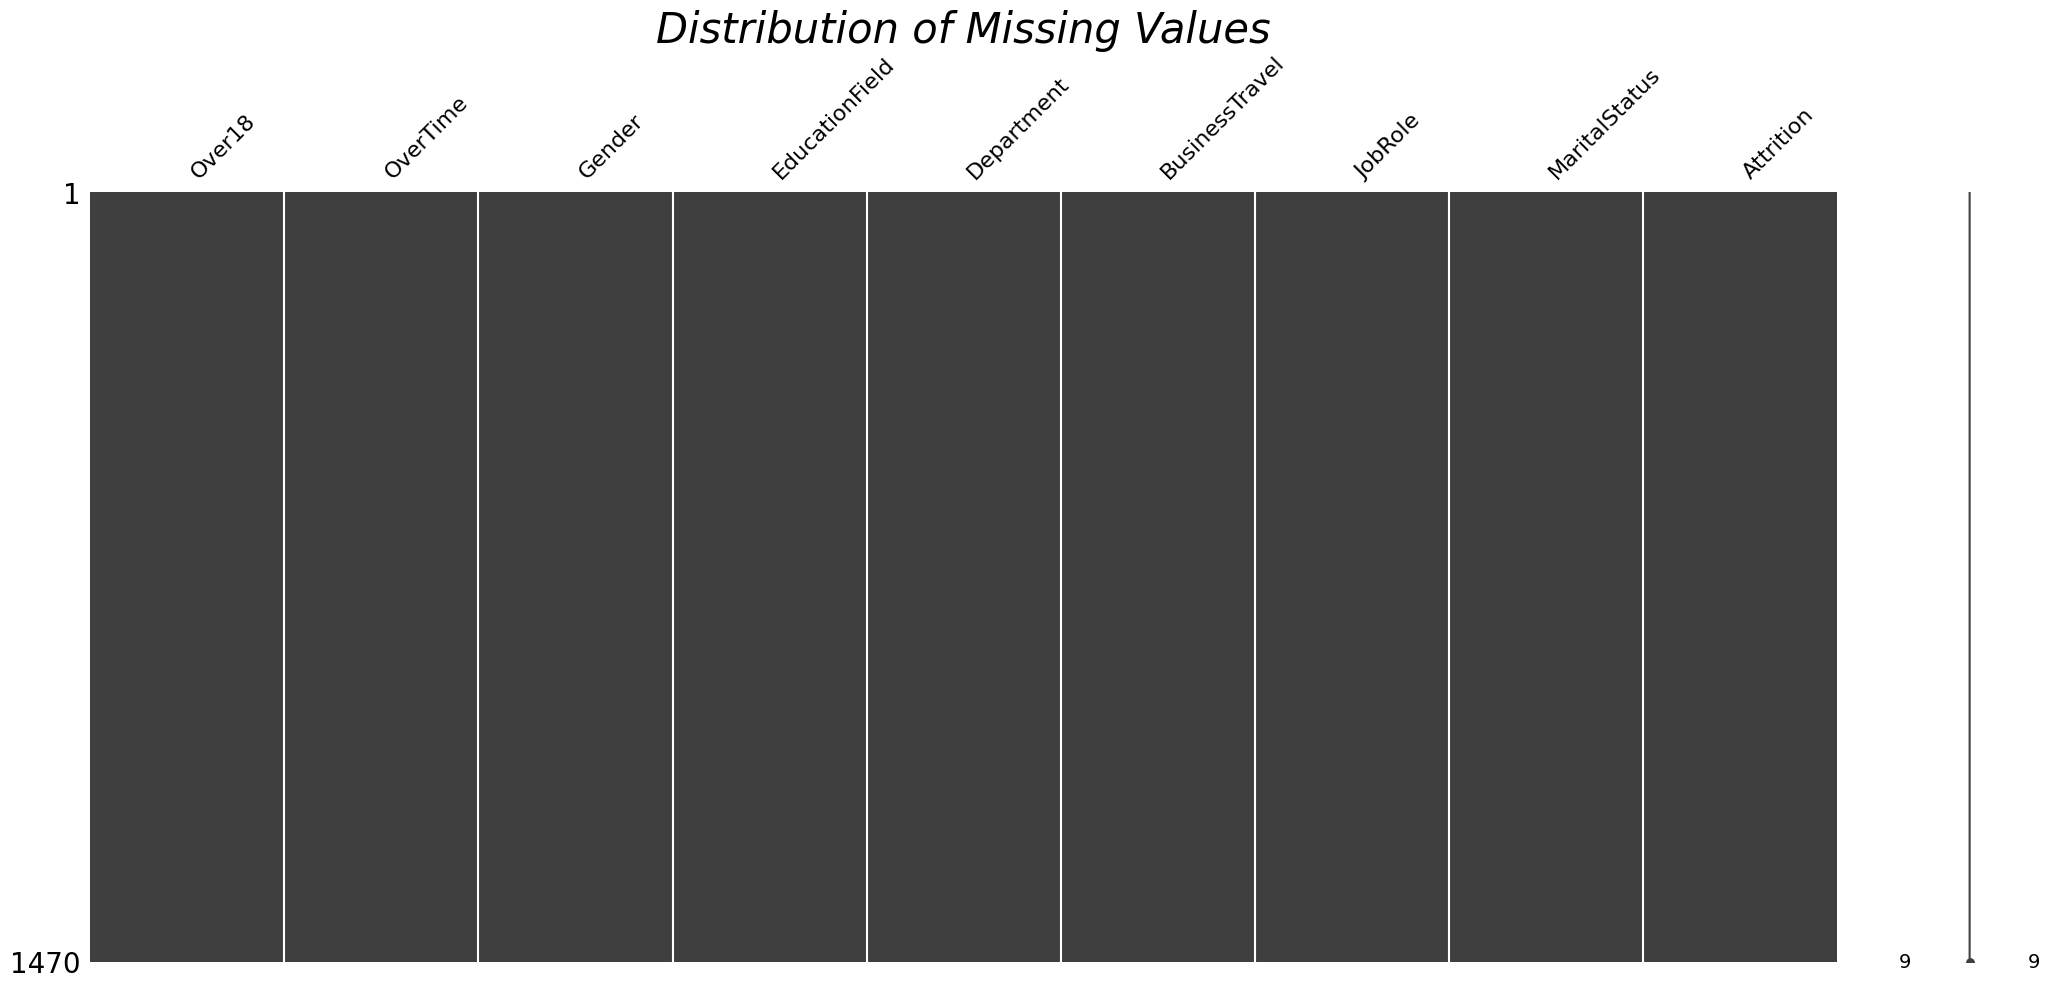

In [18]:
#Distribution graph of missing values of non-numeric data columns
msno.matrix(df[cat_cols])
plt.title('Distribution of Missing Values',fontsize=30, fontstyle= 'oblique');

In [19]:
#Calculate the number of different values using the nunique() method
n_values_df = pd.DataFrame({'n_values': df[cat_cols].nunique()})
n_values_df

,n_values
Over18,1
OverTime,2
Gender,2
EducationField,6
Department,3
BusinessTravel,3
JobRole,9
MaritalStatus,3
Attrition,2


In [20]:
#Calculate the ratio of each value using the `value_counts()` method.
value_ratios_dict = {}
for col in cat_cols:
    value_ratios_dict[col] = dict(df[col].value_counts(normalize=True) * 100)
value_ratios_df = pd.DataFrame({'value_ratios': value_ratios_dict})
value_ratios_df = value_ratios_df.transpose()[cat_cols]
value_ratios_df


,Over18,OverTime,Gender,EducationField,Department,BusinessTravel,JobRole,MaritalStatus,Attrition
value_ratios,{'Y': 100.0},"{'No': 71.70068027210884, 'Yes': 28.2993197278...","{'Male': 60.0, 'Female': 40.0}","{'Life Sciences': 41.224489795918366, 'Medical...","{'Research & Development': 65.37414965986395, ...","{'Travel_Rarely': 70.95238095238095, 'Travel_F...","{'Sales Executive': 22.176870748299322, 'Resea...","{'Married': 45.78231292517007, 'Single': 31.97...","{'No': 83.87755102040816, 'Yes': 16.1224489795..."


In [21]:
cat_cols_info_df = pd.concat([missing_ratio_df.transpose(), n_values_df.transpose(), value_ratios_df], axis=0)
pd.set_option('display.max_colwidth', None)
display(cat_cols_info_df)
pd.reset_option('display.max_colwidth')

,Over18,OverTime,Gender,EducationField,Department,BusinessTravel,JobRole,MaritalStatus,Attrition
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n_values,1,2,2,6,3,3,9,3,2
value_ratios,{'Y': 100.0},"{'No': 71.70068027210884, 'Yes': 28.29931972789116}","{'Male': 60.0, 'Female': 40.0}","{'Life Sciences': 41.224489795918366, 'Medical': 31.564625850340132, 'Marketing': 10.816326530612246, 'Technical Degree': 8.979591836734693, 'Other': 5.578231292517007, 'Human Resources': 1.8367346938775513}","{'Research & Development': 65.37414965986395, 'Sales': 30.34013605442177, 'Human Resources': 4.285714285714286}","{'Travel_Rarely': 70.95238095238095, 'Travel_Frequently': 18.843537414965986, 'Non-Travel': 10.204081632653061}","{'Sales Executive': 22.176870748299322, 'Research Scientist': 19.86394557823129, 'Laboratory Technician': 17.61904761904762, 'Manufacturing Director': 9.863945578231291, 'Healthcare Representative': 8.91156462585034, 'Manager': 6.938775510204081, 'Sales Representative': 5.646258503401361, 'Research Director': 5.442176870748299, 'Human Resources': 3.537414965986395}","{'Married': 45.78231292517007, 'Single': 31.97278911564626, 'Divorced': 22.244897959183675}","{'No': 83.87755102040816, 'Yes': 16.122448979591837}"


<b>C.Data Exploration</b>

In [22]:
plot_df = df.copy()
plot_df= plot_df['Attrition'].value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"},{"type": "pie"}]],subplot_titles=('',''))
fig.add_trace(go.Pie(values=plot_df.values,labels=plot_df.index,hole=0.3),row=1,col=2)

fig.update_traces(hoverinfo='label',
                  textfont_size = 18,
                  textposition ='auto',
                  marker=dict(colors = ["#335C42","#7E7F92"],
                              line = dict(color = 'white',
                                          width = 2)))


fig.update_layout(title ={'text' : "<b>Attrition rate of the organization's forces</b>",
                          'x' : 0.21},
                    template = 'xgridoff',
                    width = 900, height = 600,
                    legend=dict(title_font_family="Times New Roman",
                                font=dict(family="Courier",size=25,color="black" ),
                    bordercolor="Black",
                    borderwidth=2.5)
                 )
iplot(fig)

<b>| objective </b> 2

In [23]:
plot_df = df.copy()
plot_df= plot_df['Gender'].value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"},{"type": "pie"}]],subplot_titles=('',''))
fig.add_trace(go.Pie(values=plot_df.values,labels=plot_df.index),row=1,col=2)

fig.update_traces(hoverinfo='label',
                  textfont_size = 18,
                  textposition ='auto',
                  marker=dict(colors = ["#AC1F29","#7E7F92"],
                              line = dict(color = 'white',
                                          width = 2)))


fig.update_layout(title ={'text' : "<b>Gender rate of the organization's forces</b>",
                          'x' : 0.21},
                    template = 'xgridoff',
                    width = 900, height = 600,
                    legend=dict(title_font_family="Times New Roman",
                                font=dict(family="Courier",size=25,color="black" ),

                    bordercolor="Black",
                    borderwidth=2.5)
                 )
iplot(fig)

<b>| objective </b>3

In [24]:
plot_df = df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories(
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])

plot_df = plot_df['JobLevel'].value_counts()

fig = px.treemap(plot_df,
                 path=[plot_df.index],
                 values=plot_df.values,
                 title = 'Distribution of Job Level',
                 color=plot_df.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark',
                 width=1000, height=500)

percents = np.round((100*plot_df.values / sum(plot_df.values)).tolist(),2)

fig.data[0].customdata = [36.94, 4.69, 7.21, 36.33, 14.83]
fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))
fig.show()

<b> objective </b> 4 </h2>

In [25]:
plot_df = df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories(
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])

plot_df= plot_df['JobLevel'].value_counts()

colors = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450"]
data = go.Bar(x=plot_df.index, y = plot_df.values, text = plot_df.values , textposition ='inside',
              textfont = dict(size = 12,
                             color = 'black'),
              marker = dict(color = colors,
                            opacity = 0.7,
                            line_color = 'black',
                            line_width = 2))
layout = go.Layout(title = {'text': "<b>Distribution of Attrition by Job Level</b>",
                           'x':0.5,
                           'xanchor': 'center'},
                   xaxis = dict(title='<b>Job Level</b>'),
                   yaxis =dict(title='<b>The number of employees</b>'),
                   width = 900,
                   height = 600,
                   template = 'plotly_white')
fig=go.Figure(data = data, layout = layout)

iplot(fig)

<b> objective </b> 5 </h2>

In [26]:
fig = px.histogram(data_frame = df, x = 'JobRole', color = 'OverTime',
                 width=1000, height=500, template="simple_white")

fig.update_layout(
    title={
        'text': "Job Role by Over Time",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

<b> objective </b> 6 </h2>

In [27]:
new_df=df.groupby('EnvironmentSatisfaction').count()
idx=list(new_df.index) #get groups as group 1, group 2, group 3, group 4
count=list(new_df['Age'].values)

percent_dropout=[] #list contains employees dropout percent
for i in range(len(idx)):
    percent_dropout.append(round((len(df[df['EnvironmentSatisfaction']==idx[i]][df['Attrition']=='Yes'])/count[i])*100,3))

<ipython-input-27-c353b05c25c6>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [28]:
envSat_attrition_df={idx[i]:[count[i],percent_dropout[i]] for i in range(len(idx))}
envSat_attrition_df['Statistical']=['Number of employees','Percentage of leave']
envSat_attrition_df=pd.DataFrame(envSat_attrition_df).set_index('Statistical')
envSat_attrition_df.head()

,1,2,3,4
Statistical,,,,
Number of employees,284.000,287.000,453.000,446.000
Percentage of leave,25.352,14.983,13.687,13.453


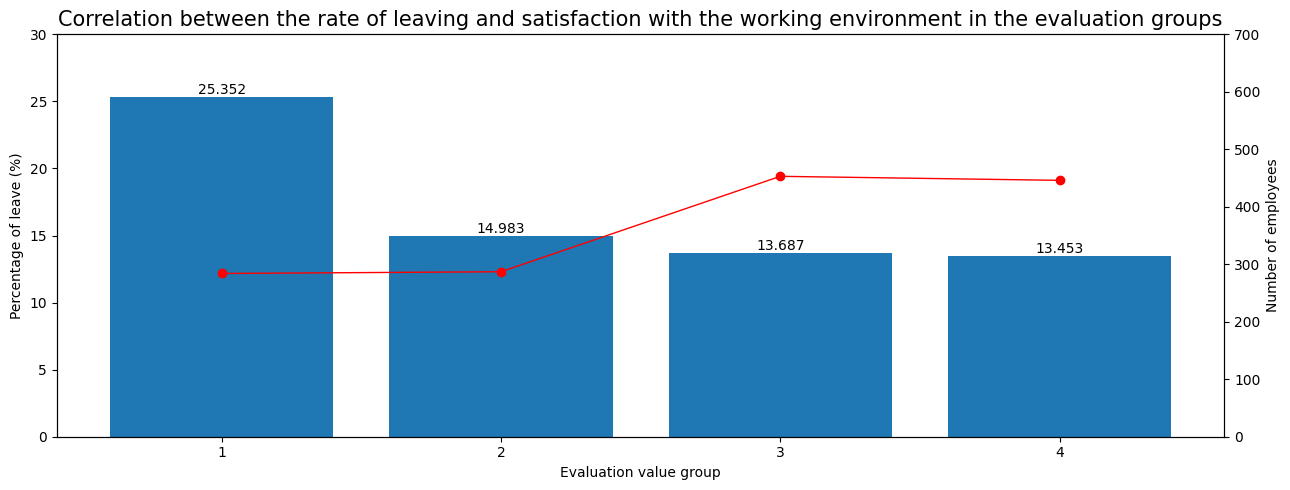

In [29]:
groups=['1','2','3','4']
fig,ax1=plt.subplots(figsize=(13,5))# bar objective
bars=ax1.bar(groups,envSat_attrition_df.loc[['Percentage of leave']].values[0])
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')
ax2=ax1.twinx()
ax2.plot(groups,envSat_attrition_df.loc[['Number of employees']].values[0],lw=1,marker='o',color='r')
ax1.set(xlabel='Evaluation value group', ylabel='Percentage of leave (%)')
ax2.set(ylabel='Number of employees')
ax1.set_ylim(0,30)
ax2.set_ylim(0,700)
ax1.set_title(f'Correlation between the rate of leaving and satisfaction with the working environment in the evaluation groups', size=15)
fig.tight_layout()
plt.show();

><b>| objective </b> 7 </h2>

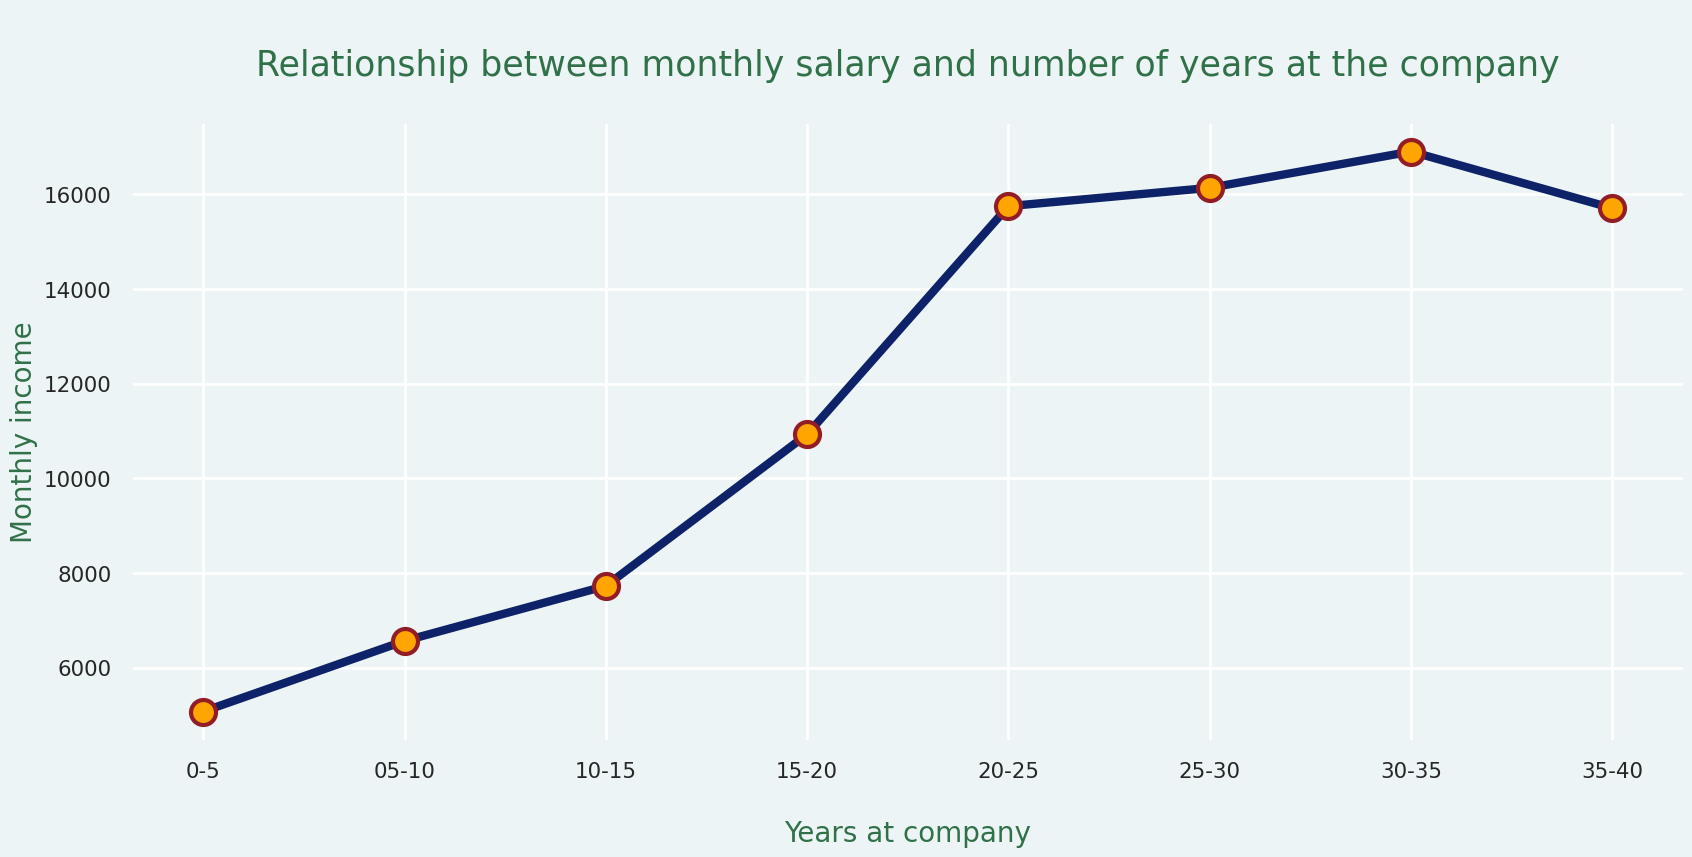

In [30]:
temp=df.copy()
conditions=[(temp['YearsAtCompany']>=0) & (temp['YearsAtCompany']<=5),
            (temp['YearsAtCompany']>5) & (temp['YearsAtCompany']<=10),
            (temp['YearsAtCompany']>10) & (temp['YearsAtCompany']<=15),
            (temp['YearsAtCompany']>15) & (temp['YearsAtCompany']<=20),
            (temp['YearsAtCompany']>20) & (temp['YearsAtCompany']<=25),
            (temp['YearsAtCompany']>25) & (temp['YearsAtCompany']<=30),
            (temp['YearsAtCompany']>30) & (temp['YearsAtCompany']<=35),
            (temp['YearsAtCompany']>35) & (temp['YearsAtCompany']<=40)]
values=['0-5','05-10','10-15','15-20','20-25','25-30','30-35','35-40']
temp['YearsRange']=np.select(conditions, values)

plot_df=temp.groupby(['YearsRange'])['MonthlyIncome'].mean().reset_index()

sns.set(rc={"axes.facecolor":"#ECF4F5","figure.facecolor":"#ECF4F5"})
sns.set_context("poster",font_scale = .7)
plt.subplots(figsize=(20,8))
p=sns.lineplot(x=plot_df["YearsRange"] ,y=plot_df["MonthlyIncome"],data=plot_df,color="#0E2269",marker="o",linewidth=6,markersize=18,markerfacecolor="orange",markeredgecolor="#921D26",markeredgewidth=3)
p.axes.set_title("\nRelationship between monthly salary and number of years at the company\n",fontsize=25, color="#307149", family ='Verdana')
p.axes.set_xlabel("\nYears at company",fontsize=20, color="#307149", family ='Verdana')
p.axes.set_ylabel("Monthly income",fontsize=20, color="#307149", family ='Verdana')
sns.despine(left=True, bottom=True)
plt.show()

<b> objective </b> 8 </h2>

In [31]:
plot_df = df.groupby(['Department','BusinessTravel']).size()
Human_Resources=np.round(plot_df['Human Resources'].values/(plot_df['Human Resources'].values.sum()),2)
Research_Development=np.round(plot_df['Research & Development'].values/(plot_df['Research & Development'].values.sum()),2)
Sales=np.round(plot_df['Sales'].values/(plot_df['Sales'].values.sum()),2)

categories = ['Non-Travel', 'Travel_Frequently','Travel_Rarely']
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
             r = Human_Resources,
             theta = categories,
             fill = 'toself',
             name = 'Human_Resources'
             ))
fig.add_trace(go.Scatterpolar(
             r = Research_Development,
             theta = categories,
             fill = 'toself',
             name = 'Research_Development'
             ))
fig.add_trace(go.Scatterpolar(
             r = Sales,
             theta = categories,
             fill = 'toself',
             name = 'Sales'
             ))
fig.update_layout(
    polar=dict(
    radialaxis=dict(
        range=[0, 1]
    )),
    font = dict(family="Franklin Gothic", size=17),
    showlegend=True,
    title = 'Situation of business travel of departments',
    height = 500,
    width = 1000
)
fig.layout.template = 'plotly_dark'
fig.show()

<b> objective </b> 9 </h2>

In [32]:
new_df = df.loc[:, ['Age', 'Attrition','BusinessTravel','Department','EducationField','EnvironmentSatisfaction',
                     'Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus',
                     'MonthlyIncome','Over18','OverTime','StockOptionLevel','TotalWorkingYears','YearsAtCompany',
                     'YearsInCurrentRole','YearsWithCurrManager']]
new_df['Attrition'] = new_df['Attrition'].replace('Yes', 1).replace('No', 0)


In [33]:
dodi = new_df.copy()
conditions = [(dodi['Age'] >= 18) & (dodi['Age'] <= 20),
              (dodi['Age'] > 20) & (dodi['Age'] <= 25),
              (dodi['Age'] > 25) & (dodi['Age'] <= 30),
              (dodi['Age'] > 30) & (dodi['Age'] <= 35),
              (dodi['Age'] > 35) & (dodi['Age'] <= 40),
              (dodi['Age'] > 40) & (dodi['Age'] <= 45),
              (dodi['Age'] > 45) & (dodi['Age'] <= 50),
              (dodi['Age'] > 50) & (dodi['Age'] <= 55),
              (dodi['Age'] > 55) & (dodi['Age'] <= 60)
             ]

values = ['18-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60']
new_df['Age_Range'] = np.select(conditions, values)
percent_age_range = new_df['Age_Range'].value_counts().values / new_df.shape[0] * 100
for i in range(len(percent_age_range)):
    percent_age_range[i] = '{:.2f}'.format(percent_age_range[i])

    plot_df = new_df['Age_Range'].value_counts()
plot_df = pd.DataFrame({'Age_Range': plot_df.index, 'Count': plot_df.values})
plot_df['Percent'] = percent_age_range

In [34]:
fig = px.treemap(plot_df,
                 path=['Age_Range'],
                 values='Count',
                 title = 'Distribution of Job Level',
                 color=plot_df.index,
                 color_discrete_sequence=px.colors.sequential.PuBuGn,
                 template='plotly_dark', hover_data=['Percent'],
                 width=1000, height=500)

fig.data[0].texttemplate = '%{label}<br>%{value}<br>%{customdata[0]}%'

fig.update_layout(
    font=dict(size=19,family="Franklin Gothic"))
fig.show()

<b>| objective </b> 10</h2>

<ipython-input-35-2f0e4c48cb1b>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




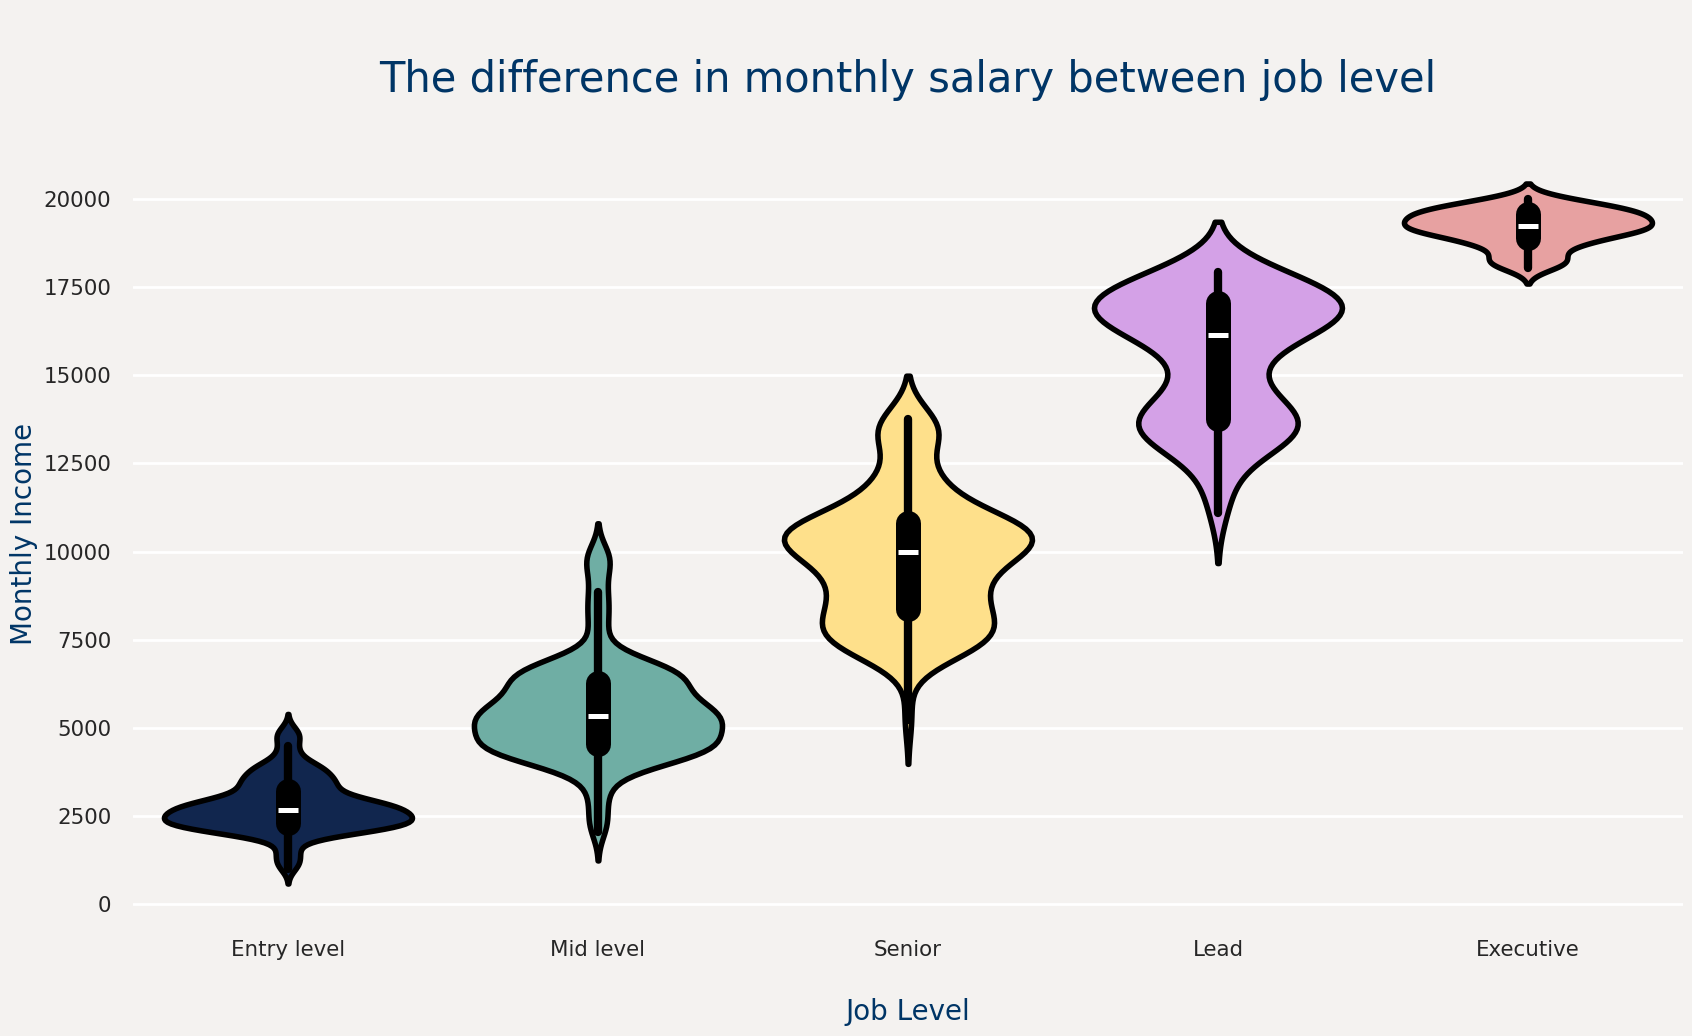

In [35]:
palette = ["#11264e","#6faea4","#FEE08B","#D4A1E7","#E7A1A1"]
sns.set(rc={"axes.facecolor":"#F4F2F0","figure.facecolor":"#F4F2F0"})
sns.set_context("poster",font_scale = .7)

plot_df = df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories(
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])

plt.subplots(figsize=(20, 10))

p=sns.violinplot(x=plot_df["JobLevel"],y=plot_df["MonthlyIncome"],order=plot_df["JobLevel"].value_counts().index,palette=palette,saturation=1,linewidth=4,edgecolor="black")
p.axes.set_title("\nThe difference in monthly salary between job level\n",fontsize=30, family ='Verdana', color ='#003566')
p.axes.set_xlabel("\nJob Level",fontsize=20, family ='Verdana', color ='#003566')
p.axes.set_ylabel("Monthly Income",fontsize=20, family ='Verdana', color ='#003566')

sns.despine(left=True, bottom=True)


<b> objective </b> 11</h2>

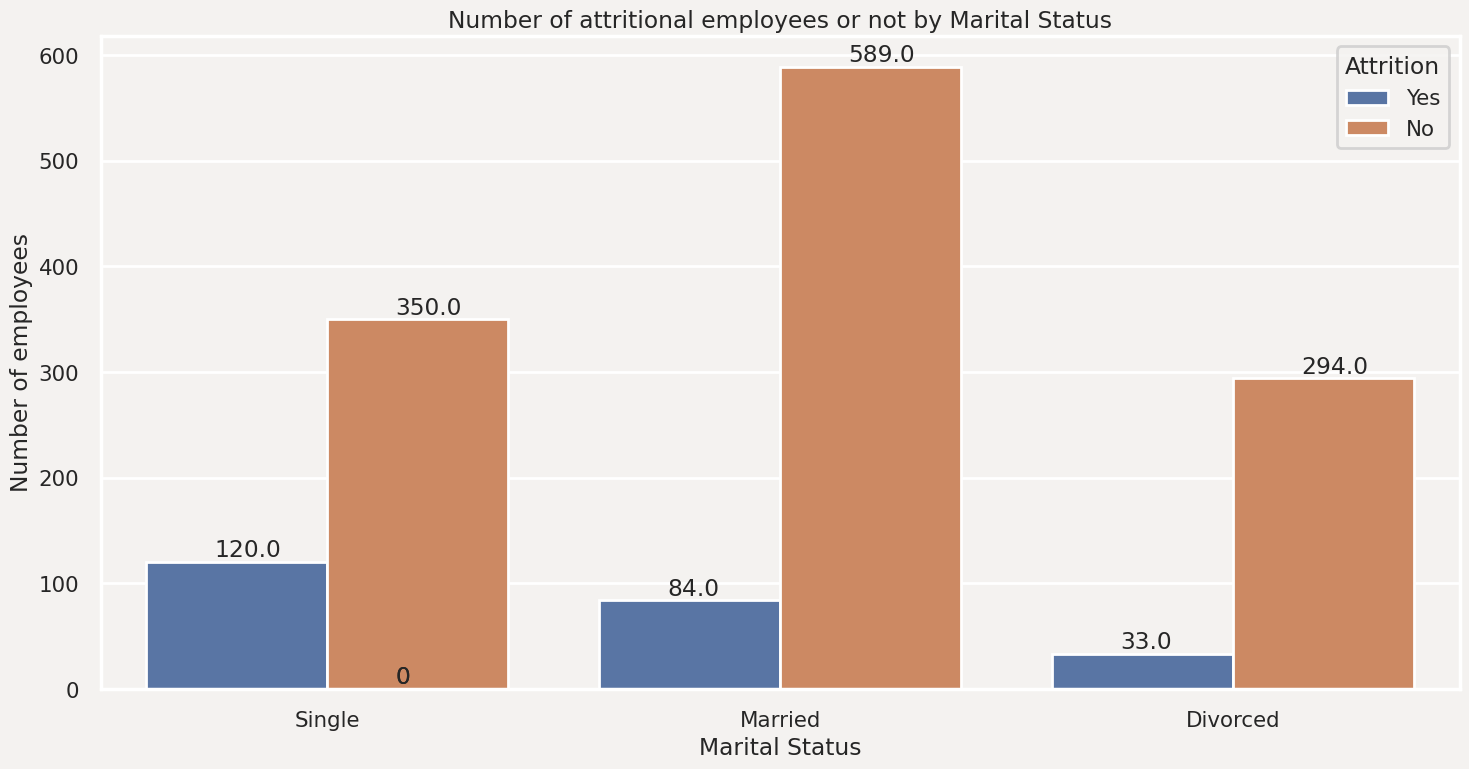

In [36]:
plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
g = sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
g.set(title='Number of attritional employees or not by Marital Status')
g.set_xlabel('Marital Status')
g.set_ylabel('Number of employees')
g.set_yticks(range(0, 700, 100))
for p in g.patches:
    g.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+5))
plt.show()

<b> objective </b> 12 </h2>

In [37]:
plot_df = df.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories(
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])
col=['#88C9D1', '#CCD188', '#707BAD', '#48795E','#C99193']
fig = px.scatter(plot_df, x='TotalWorkingYears', y='MonthlyIncome',
                 color='JobLevel', size='MonthlyIncome',
                 color_discrete_sequence=col,
                 category_orders={'JobLevel': ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive']})

fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  title='<b>Monthly income according to the total number of years of work and level in the job </b>',
                  title_font = dict(size = 15, family ='Verdana', color ='#003566'),
                  xaxis_title='Total Working Years', yaxis=dict(title='Monthly income',tickprefix='$'),
                  legend_title='', font_color='#28221D',
                  margin=dict(l=40, r=30, b=80, t=120),paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',
                  height = 500,
                  width = 1000)
fig.show()

<b> objective </b> 13 </h2>

In [38]:
def year_stats(year):
    return year//5;

df_ = df.copy()
df_['year_stats'] = df_['YearsAtCompany'].map(year_stats)

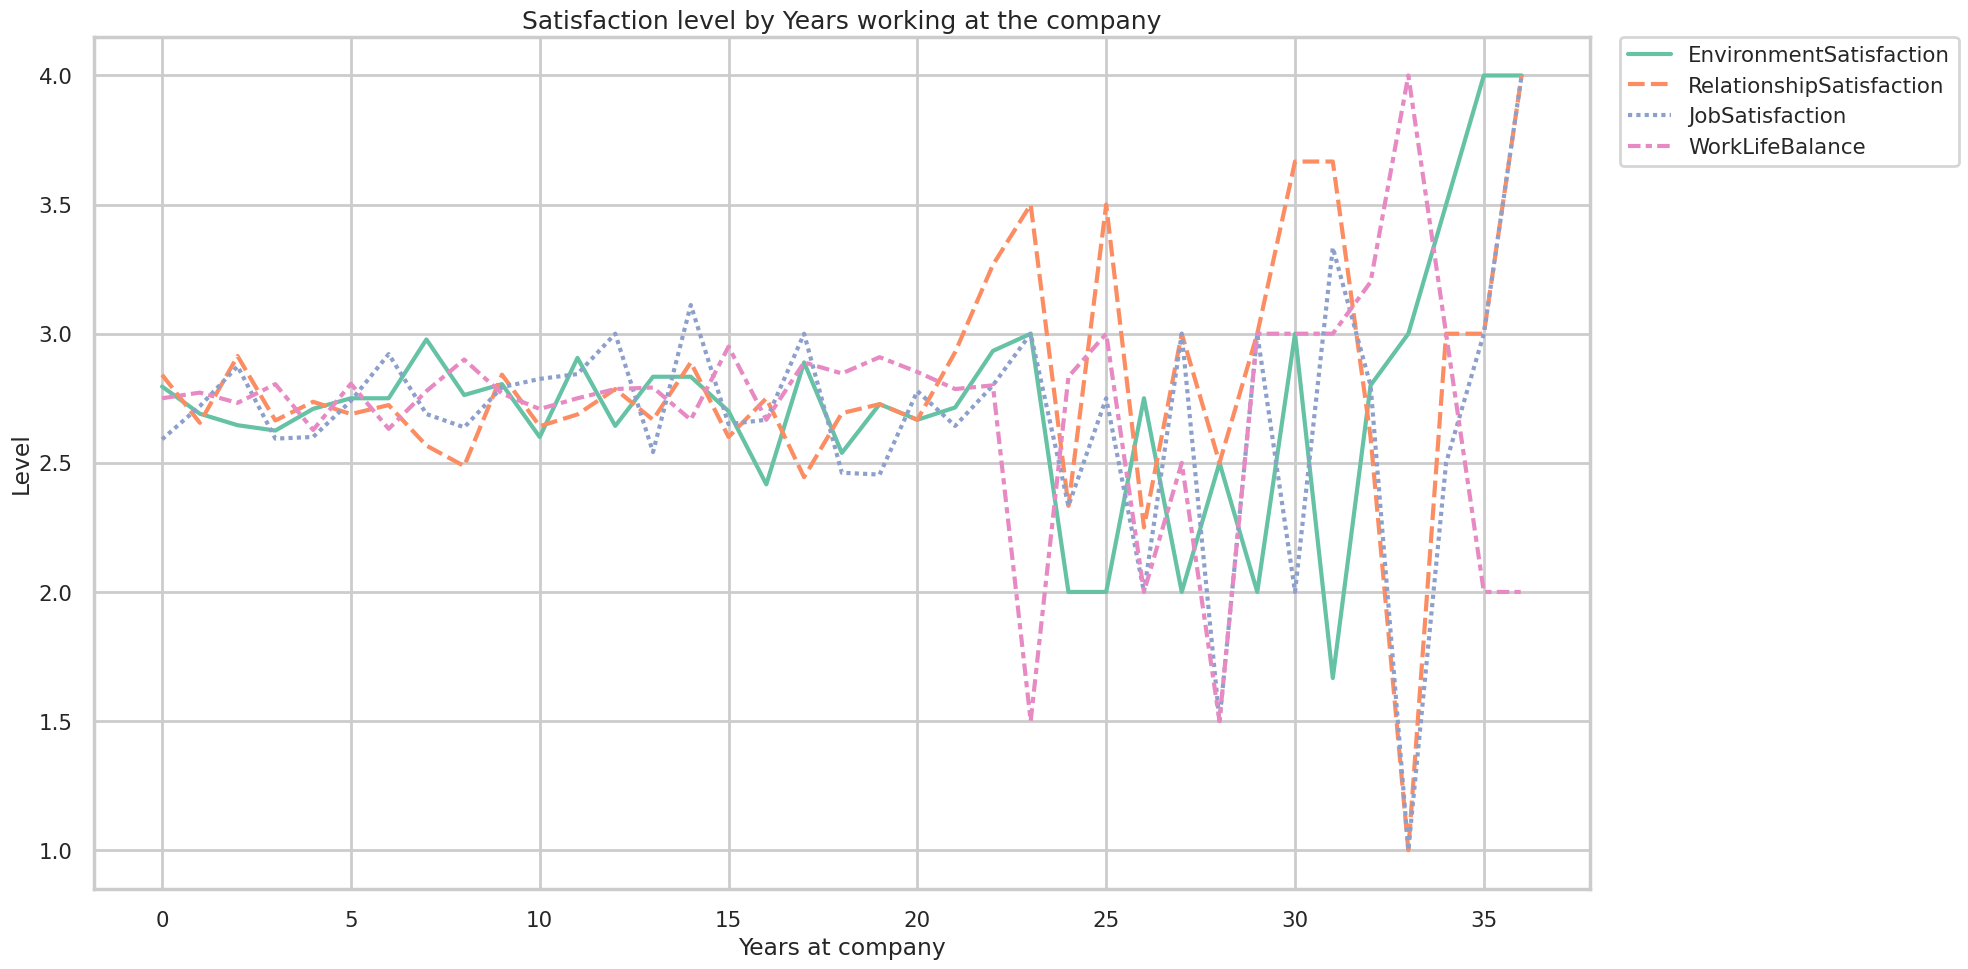

In [39]:
df_satis = df_[['EnvironmentSatisfaction','RelationshipSatisfaction', 'JobSatisfaction','WorkLifeBalance', 'YearsAtCompany', 'year_stats']]
df_satis_year = df_satis.groupby('YearsAtCompany')[['EnvironmentSatisfaction','RelationshipSatisfaction','WorkLifeBalance', 'JobSatisfaction']].mean().reset_index()
sns.set_palette("Set2")
sns.set_style('whitegrid')
plt.subplots(figsize=(20, 10))
sns.lineplot(data = df_satis_year[['EnvironmentSatisfaction','RelationshipSatisfaction', 'JobSatisfaction','WorkLifeBalance']])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.title('Satisfaction level by Years working at the company', fontsize = 18)

plt.xlabel('Years at company')
plt.ylabel('Level')
plt.show()

<b> objective </b> 14 </h2>

In [40]:
df_['satisfaction'] = (df_['JobSatisfaction'] + df_['EnvironmentSatisfaction'] + df_['RelationshipSatisfaction'])/3

<b> objective </b> 15 </h2>

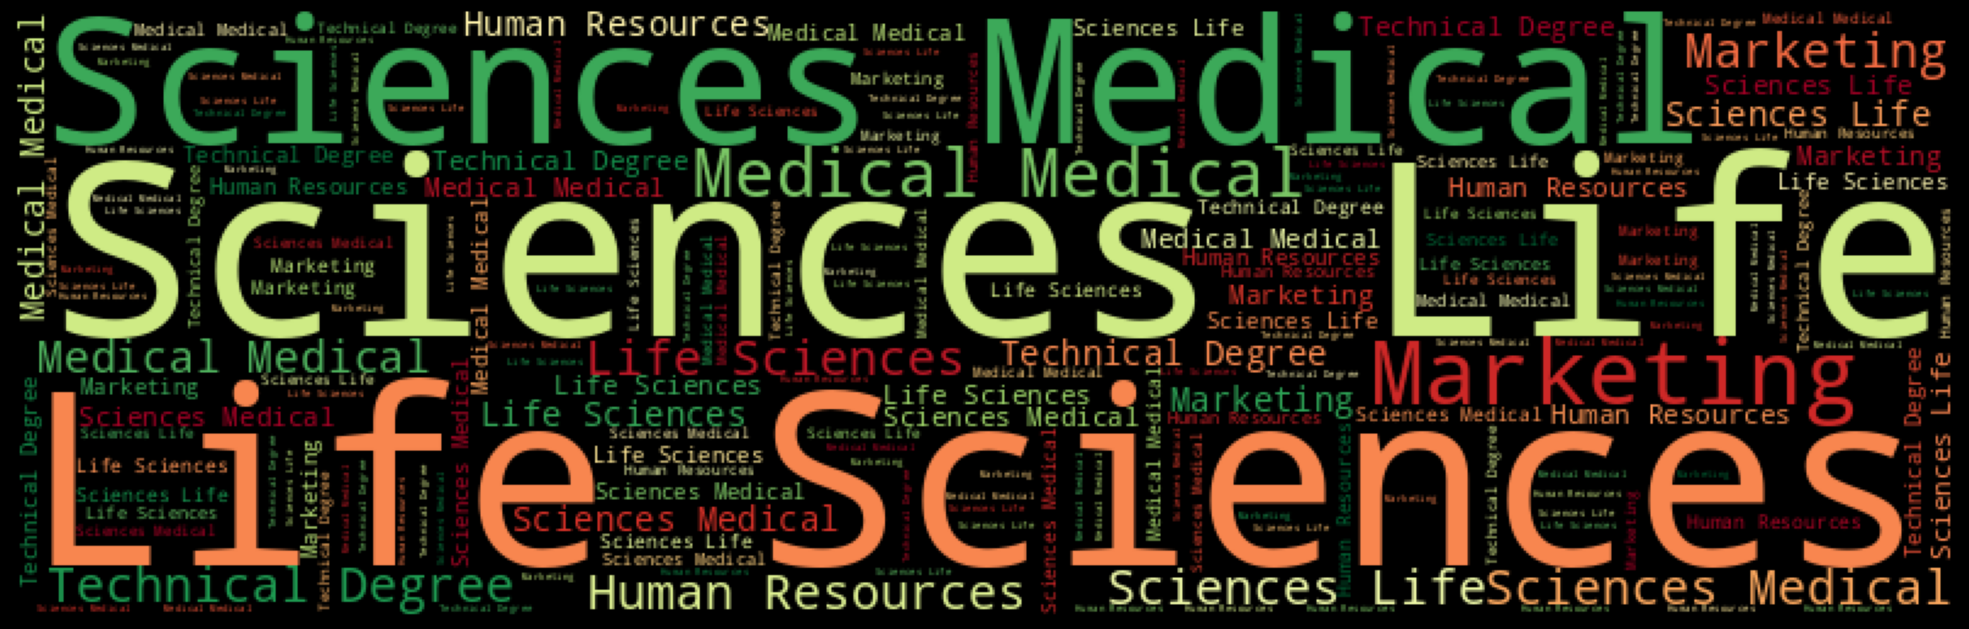

In [42]:
text = " ".join(EducationField for EducationField in df["EducationField"])
wordcloud = WordCloud(width = 800, height = 250,
            background_color ="black",colormap="RdYlGn",max_font_size=100, stopwords =None,repeat= True).generate(text)
plt.figure(figsize = (20, 8),facecolor= "black")
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0)
plt.show()

<b>D. Machine Learning Models</b>

In [43]:
df_copy=df.copy()

<b>1. Encoding catalog attributes in numerical form</b></h2>

In [44]:
#filter out category attributes
cat_cols=df_copy.select_dtypes(exclude=['int32','int64','float32','float64'])
cat_cols.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [45]:
#count the number of distinct values in each of the above category attributes
count_uvalue=[cat_cols[c].nunique() for c in list(cat_cols.columns)]
count_uvalue

[2, 3, 3, 6, 2, 9, 3, 1, 2]

In [46]:
#remove attribute 'Over18'
df_copy.drop(['Over18'],axis=1, inplace=True)

In [47]:
#convert category attributes with only 2 distinct values to numeric by assigning labels
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df_copy['Attrition']=label_encoder.fit_transform(df['Attrition'])
df_copy['OverTime']=label_encoder.fit_transform(df['OverTime'])
df_copy['Gender']=label_encoder.fit_transform(df['Gender'])

In [48]:
#convert category attributes with more than 2 distinct values to numeric using one-hot vector
df_copy=pd.get_dummies(df_copy, columns=['BusinessTravel', 'Department', 'EducationField',
                               'JobRole', 'MaritalStatus'])

In [49]:
df_copy.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,1,0,0,0,0,0,0,0,1,0


In [50]:
#delete 'StandardHours'
df_copy.drop(['StandardHours'],axis=1,inplace=True)

In [51]:
correlations=df_copy.corr()
correlations

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,-0.036311,0.024287,...,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,0.029453,-0.006846,...,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,-0.011716,0.023381,...,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,-0.001851,0.031131,...,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,-0.016547,0.016775,...,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.022556,0.035179,...,-0.019722,-0.035058,-0.014350,-0.013983,-0.017686,0.023263,0.006255,-0.025149,0.053933,-0.035189
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,0.000508,-0.049857,...,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035
Gender,-0.036311,0.029453,-0.011716,-0.001851,-0.016547,NaN,0.022556,0.000508,1.000000,-0.000478,...,0.067793,-0.033880,-0.065197,-0.006121,0.009745,-0.005348,-0.028877,0.046076,-0.007804,-0.032752
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,-0.000478,1.000000,...,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436


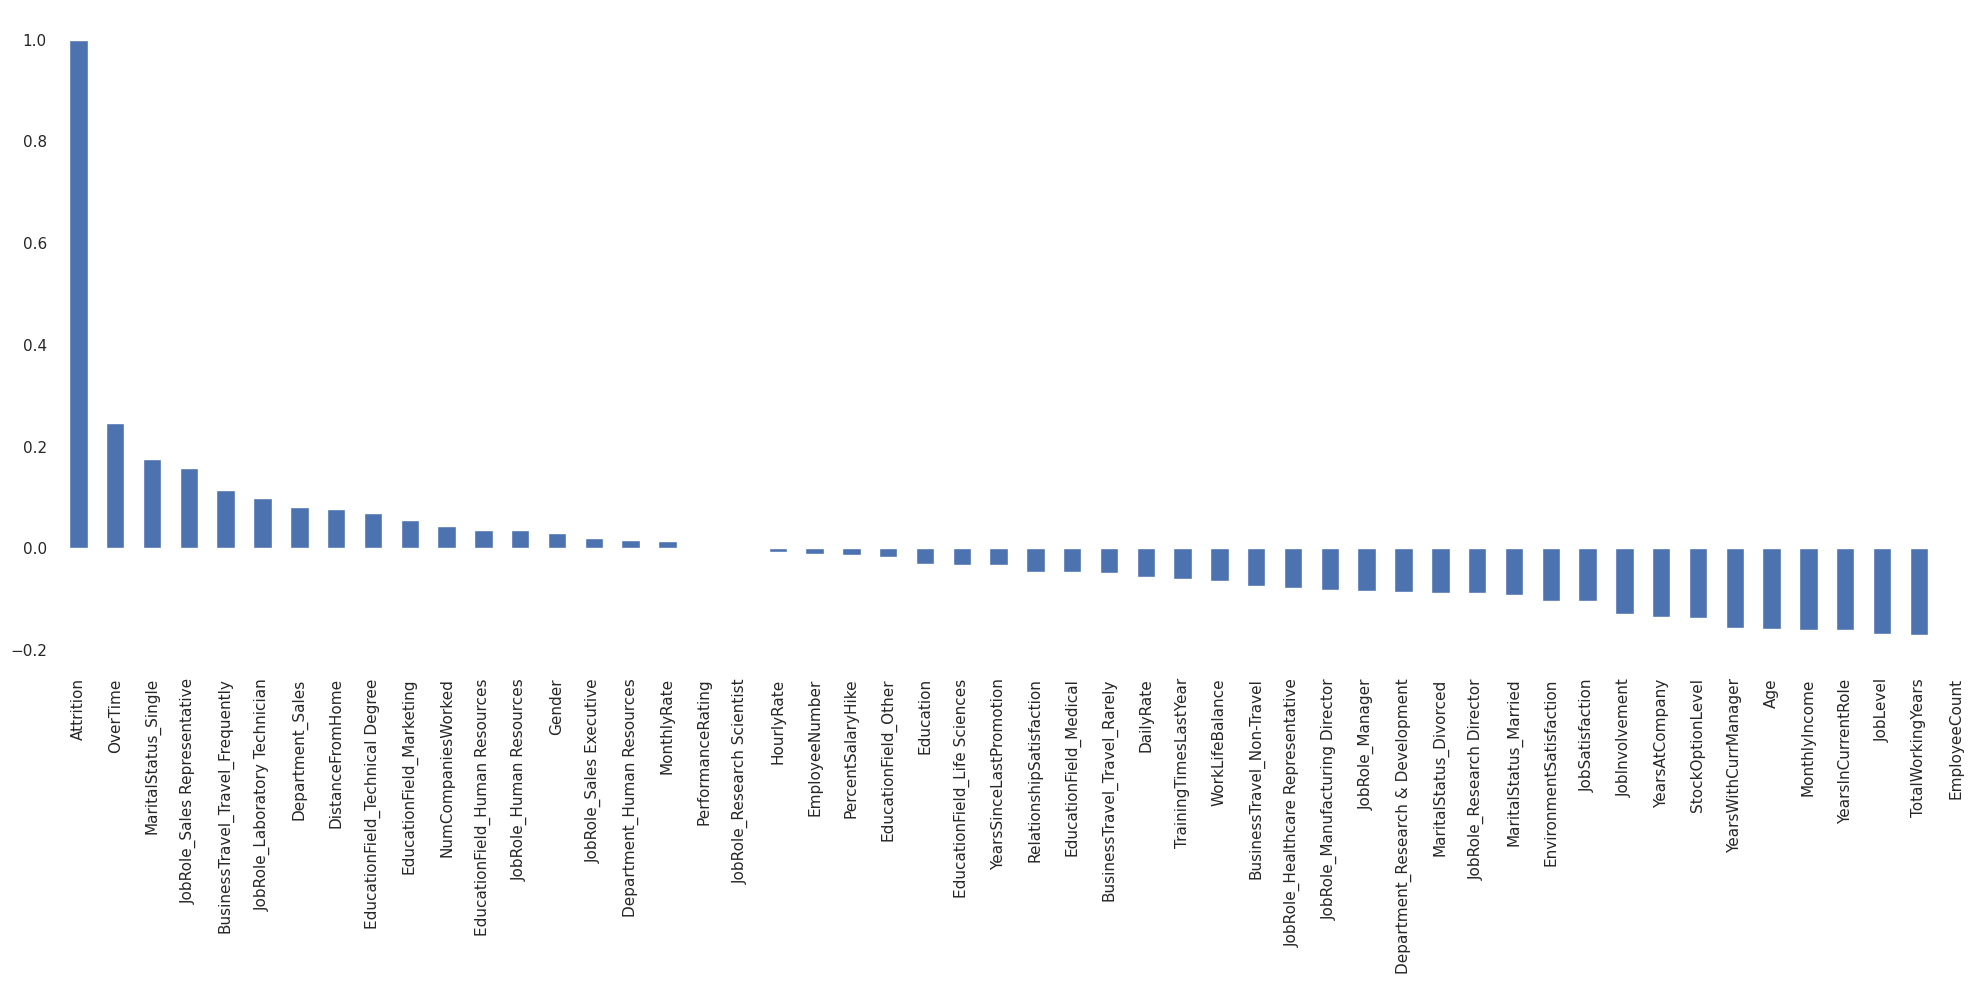

In [52]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
plt.figure(figsize=(20,10))
correlations['Attrition'].sort_values(ascending = False).plot(kind='bar');

In [53]:
df_copy.drop(['EmployeeCount'],axis=1,inplace=True)

In [54]:
correlations.drop(['EmployeeCount'],axis=1,inplace=True)

In [55]:
correlations.drop(['EmployeeCount'],axis=0,inplace=True)

In [56]:
threshold=0.7
cols=list(correlations.columns)
cols_at_index=list(correlations.index)
feature1, feature2, correlation=[], [], []
for i in range(len(cols)):
    for j in range(len(correlations)):
        if correlations[cols[i]][j]>=threshold and correlations[cols[i]][j]<1 and cols_at_index[j] not in feature1:
            feature1.append(cols[i])
            feature2.append(cols_at_index[j])
            correlation.append(correlations[cols[i]][j])
new_df=pd.DataFrame({'feature1':[feature1[i] for i in range(len(feature1))],
                     'feature2':[feature2[i] for i in range(len(feature2))],
                     'correlation':[correlation[i] for i in range(len(correlation))],})
new_df

,feature1,feature2,correlation
0,JobLevel,MonthlyIncome,0.950300
1,JobLevel,TotalWorkingYears,0.782208
2,MonthlyIncome,TotalWorkingYears,0.772893
3,PercentSalaryHike,PerformanceRating,0.773550
4,YearsAtCompany,YearsInCurrentRole,0.758754
5,YearsAtCompany,YearsWithCurrManager,0.769212
6,YearsInCurrentRole,YearsWithCurrManager,0.714365
7,Department_Human Resources,JobRole_Human Resources,0.904983
8,Department_Sales,JobRole_Sales Executive,0.808869


In [57]:
df_copy.drop(['TotalWorkingYears', 'JobLevel', 'PercentSalaryHike', 'YearsInCurrentRole',
         'YearsWithCurrManager', 'Department_Human Resources', 'Department_Sales'],axis=1,inplace=True)

In [58]:
df_copy.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,2,0,94,3,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,2,3,1,61,2,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,4,1,92,2,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,5,4,0,56,3,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,7,1,1,40,3,...,1,0,0,0,0,0,0,0,1,0


<b>3. Handling missing values</b></h2>

In [59]:
df_copy.isnull().sum()

Age                                  0
Attrition                            0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EmployeeNumber                       0
EnvironmentSatisfaction              0
Gender                               0
HourlyRate                           0
JobInvolvement                       0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
YearsSinceLastPromotion              0
BusinessTravel_Non-Travel            0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Dev

<b>III. Building a machine learning model </b> </h2>

<b>1. Logistic Regression for Binary Classification</b></h2>

<b>3. Implement</b></h2>

**Create a set of input attributes and a set of target variables from the original data set.**

In [60]:
X=np.array(df_copy.drop(['Attrition'],axis=1))
y=np.array(df_copy['Attrition'])

In [61]:
X

array([[  41, 1102,    1, ...,    0,    0,    1],
       [  49,  279,    8, ...,    0,    1,    0],
       [  37, 1373,    2, ...,    0,    0,    1],
       ...,
       [  27,  155,    4, ...,    0,    1,    0],
       [  49, 1023,    2, ...,    0,    1,    0],
       [  34,  628,    8, ...,    0,    1,    0]])

In [62]:
y

array([1, 0, 1, ..., 0, 0, 0])

**Divide data set into training set and test set:**

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [64]:
print(X_train.shape)
print(X_test.shape)

(1176, 43)
(294, 43)


**Model Settings:**

In [65]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe.fit(X_train, y_train)
pipe.named_steps['classifier'].get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 1},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [66]:
#predict
predictions=pipe.predict(X_test)
predictions

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0])

**Evaluate the model:** First consider the value of accuracy score.

In [67]:
acc_score=accuracy_score(predictions, y_test)
print(acc_score)

0.8775510204081632


In [68]:
report=classification_report(predictions, y_test)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       267
           1       0.41      0.74      0.53        27

    accuracy                           0.88       294
   macro avg       0.69      0.82      0.73       294
weighted avg       0.92      0.88      0.89       294



**Check data balance:**

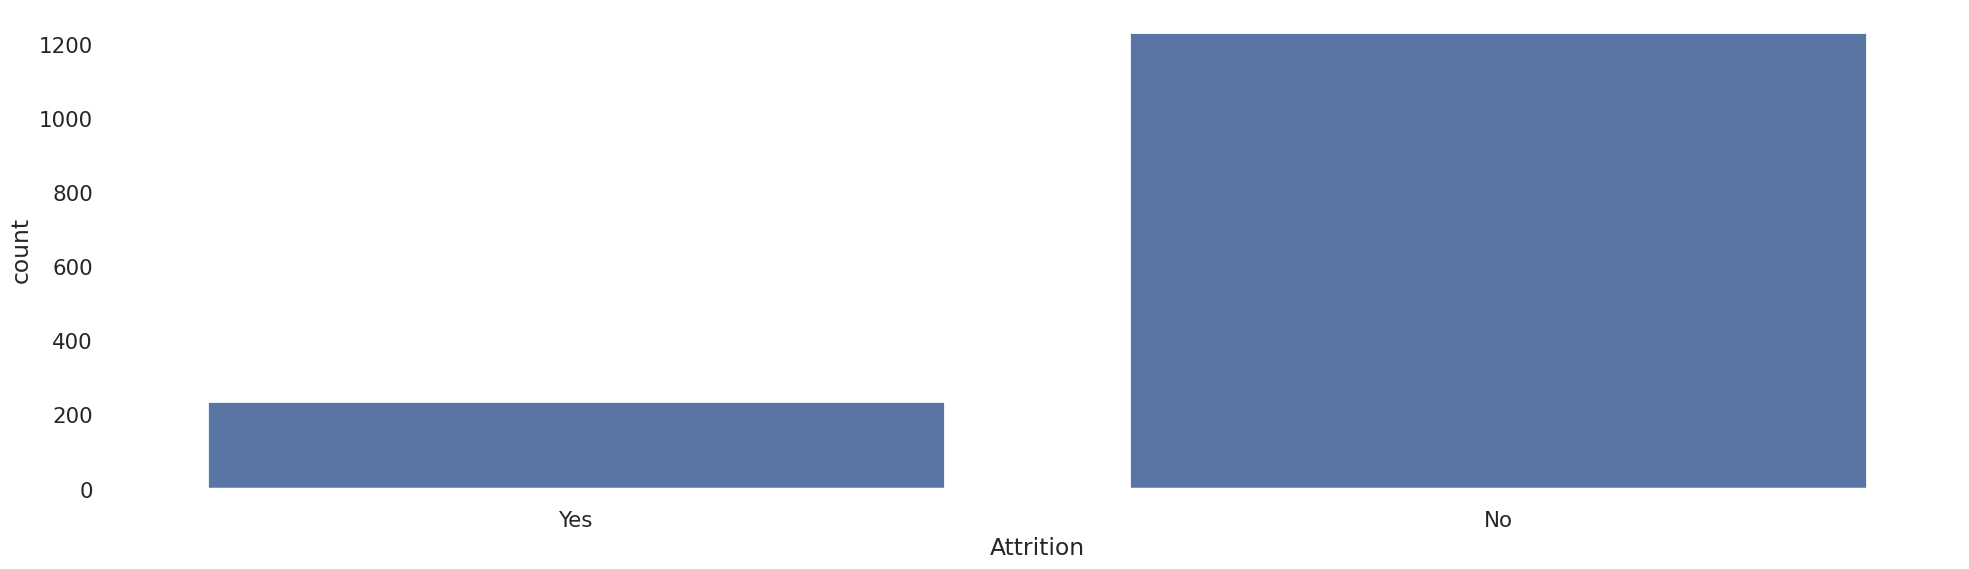

In [69]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
sns.set_context("poster",font_scale = .7)
plt.subplots(figsize=(20,6))
sns.countplot(data=df,x=df['Attrition']);

**Use weights to increase model penalty if wrong class prediction:**

In [70]:
pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:2},max_iter=10000))
])

pipe2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=10000,
                                    solver='liblinear'))])

In [71]:
predictions2=pipe2.predict(X_test)

In [72]:
acc_score2=accuracy_score(predictions2, y_test)
print(acc_score2)

0.8741496598639455


In [73]:
report2=classification_report(predictions2, y_test)
print(report2)

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       246
           1       0.61      0.62      0.62        48

    accuracy                           0.87       294
   macro avg       0.77      0.77      0.77       294
weighted avg       0.88      0.87      0.87       294



**Apply SMOTE algorithm:**

In [74]:
from imblearn.over_sampling import SMOTE
X,y=SMOTE(sampling_strategy=1, random_state=0).fit_resample(X, y)

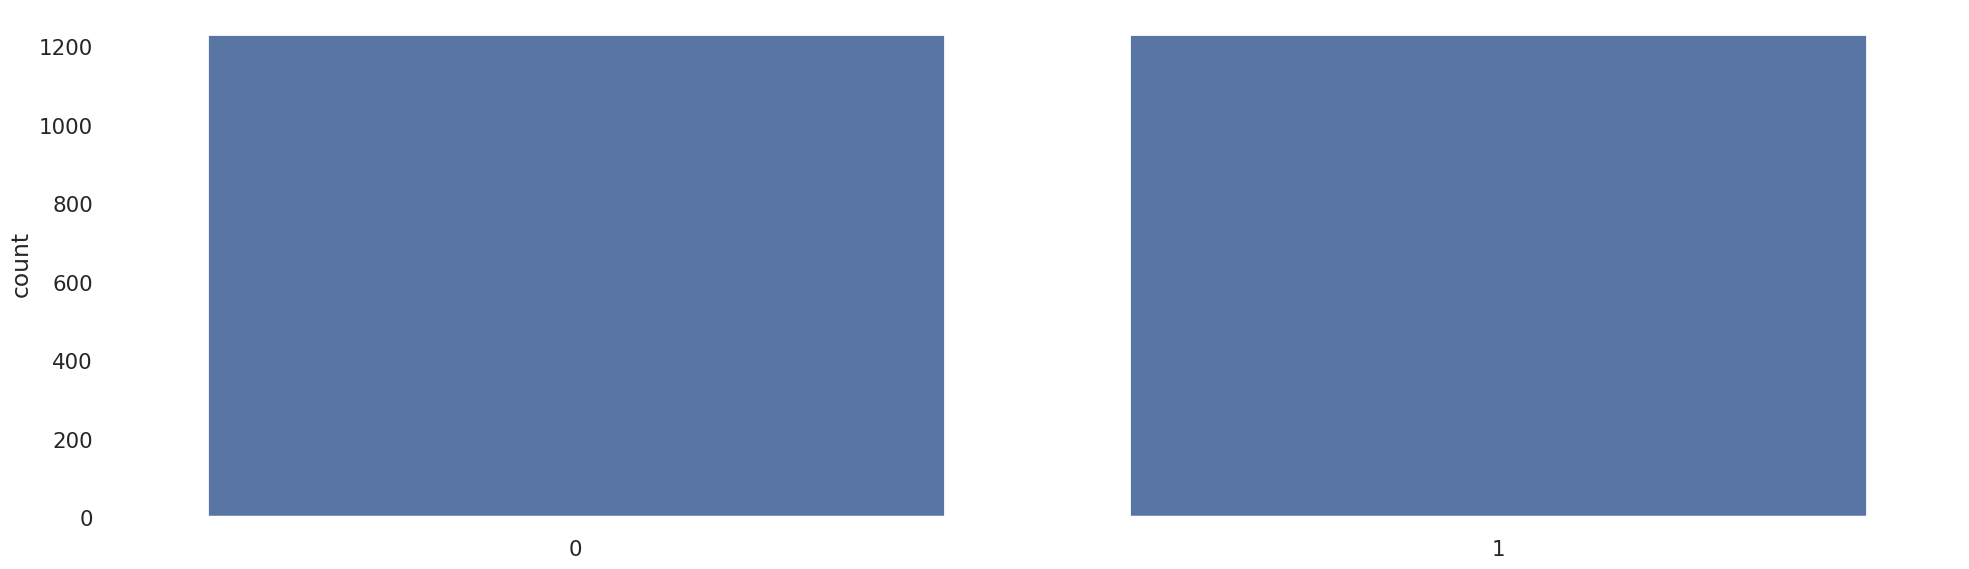

In [75]:
sns.set(rc={"axes.facecolor":"white","figure.facecolor":"white"})
sns.set_context("poster",font_scale = .7)
plt.subplots(figsize=(20,6))
sns.countplot(x=y);

**Divide data set into training set and test set:**

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [77]:
print(X_train.shape)
print(X_test.shape)

(1972, 43)
(494, 43)


**Model Settings:**

In [78]:
pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver="liblinear",penalty="l2",
                                      class_weight={0:1,1:1},max_iter=10000))
])

pipe3.fit(X_train, y_train)
pipe3.named_steps['classifier'].get_params()

{'C': 1.0,
 'class_weight': {0: 1, 1: 1},
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [79]:
#dự đoán
predictions3=pipe3.predict(X_test)
predictions3

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,

**Model rating:**

In [80]:
#First look at the model's accuracy score
acc_score3=accuracy_score(predictions3, y_test)
print(acc_score3)

0.9048582995951417


In [81]:
#More detailed look at other metric values like F1-score or Recall score
report3=classification_report(predictions3, y_test)
print(report3)

              precision    recall  f1-score   support

           0       0.98      0.84      0.91       268
           1       0.84      0.98      0.90       226

    accuracy                           0.90       494
   macro avg       0.91      0.91      0.90       494
weighted avg       0.92      0.90      0.90       494

